In [145]:
import numpy as np
from tools import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
data_paths[0]

'/home/liang134@chapman.edu/Documents/HCP_MEG/data/100307/MEG/Restin/rmegpreproc/100307_MEG_3-Restin_rmegpreproc.mat'

In [147]:
filename = data_paths[0].split('/')[-1]
subject_id = filename.split('_')[0]
session_id = filename.split('_')[2]

In [148]:
subject_id

'100307'

In [149]:
session_id

'3-Restin'

In [150]:
data = extract_data(data_paths[0])

Sensor channel position (271, 3) extracted...
Sensor channel type (271,) extracted...
Sensor channel label (271,) extracted...
Sampling frequency 508.62752490487884 extracted ...
Labels after preprocessing (241,) extracted ...
Trials after preprocessing (241, 1018, 147) extracted ...
The time course of the trials (1018,) extracted ...


In [157]:
def analysis_smooth_single_trial(data, win_size, sample_id=1):
    trials = data['trial']
    smoothed = smooth_channels_3d(trials, win_size=win_size)
    available_channels = get_available_channels(data)
    orders = ordering(available_channels, data['label'])
    avail_smoothed = smoothed[orders,:,:]
    savepath = 'output/{}_single_timecourse_{}_{}.png'.format(subject_id, session_id, str(win_size))
    matshow_w_correct_axis(avail_smoothed[:,:,int(sample_id)]*10e12, 
                           title=savepath, 
                           x=1018, y=1, s=(40, 10), colorbar=True, height=20, vrange = [-10,10],
                           filename=savepath)
    
def analysis_smooth_over_session(data, win_size=100, sampling=100):
    trials = data['trial']
    concat_trials = concatenate_trials(trials)
    smoothed = smooth_channels_2d(concat_trials, win_size=win_size)
    available_channels = get_available_channels(data)
    orders = ordering(available_channels, data['label'])
    sampling_index = [x for x in range(0, smoothed.shape[1], sampling)]
    avail_smoothed = smoothed[orders,:][:,sampling_index]
    print(avail_smoothed.shape)
    savepath = 'output/{}_session_timecourse_{}_{}.png'.format(subject_id, session_id, str(win_size))
    matshow_w_correct_axis(avail_smoothed*10e12, 
                           title=savepath, 
                           x=avail_smoothed.shape[1], y=1, s=(100, 10), 
                           colorbar=True, height=20, 
                           vrange = [-5,5], 
                           filename=savepath)
    
    savepath = 'output/{}_session_corr_{}_{}.png'.format(subject_id, session_id, str(win_size))
    corr = np.corrcoef(avail_smoothed)
    plot_correlation(corr, title=savepath,
                         vrange=[], figure_size=(50, 40), zero_diagonal=False,
                     filename=savepath)
    
    


(241, 2992)


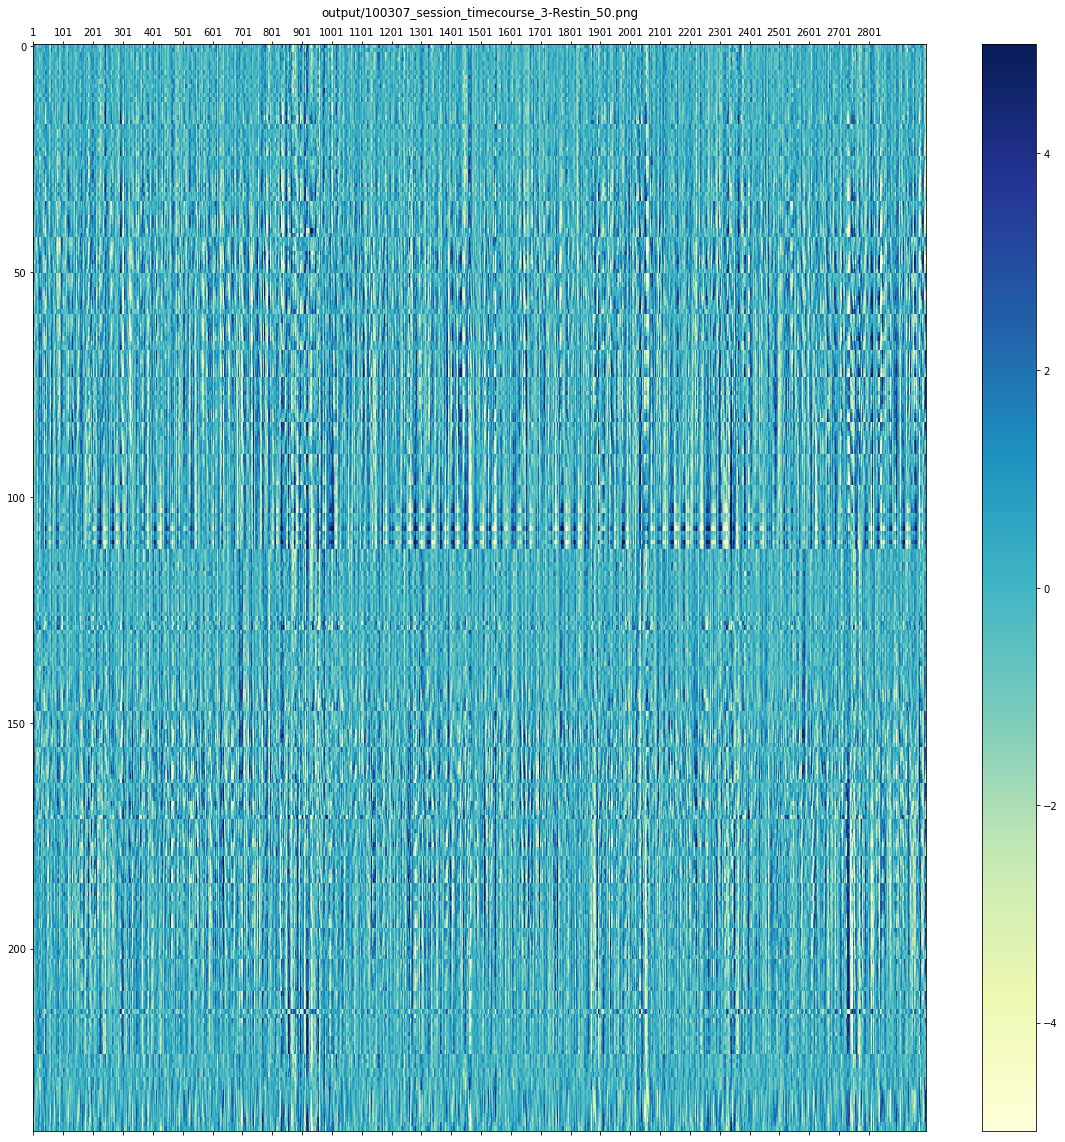

<Figure size 432x288 with 0 Axes>

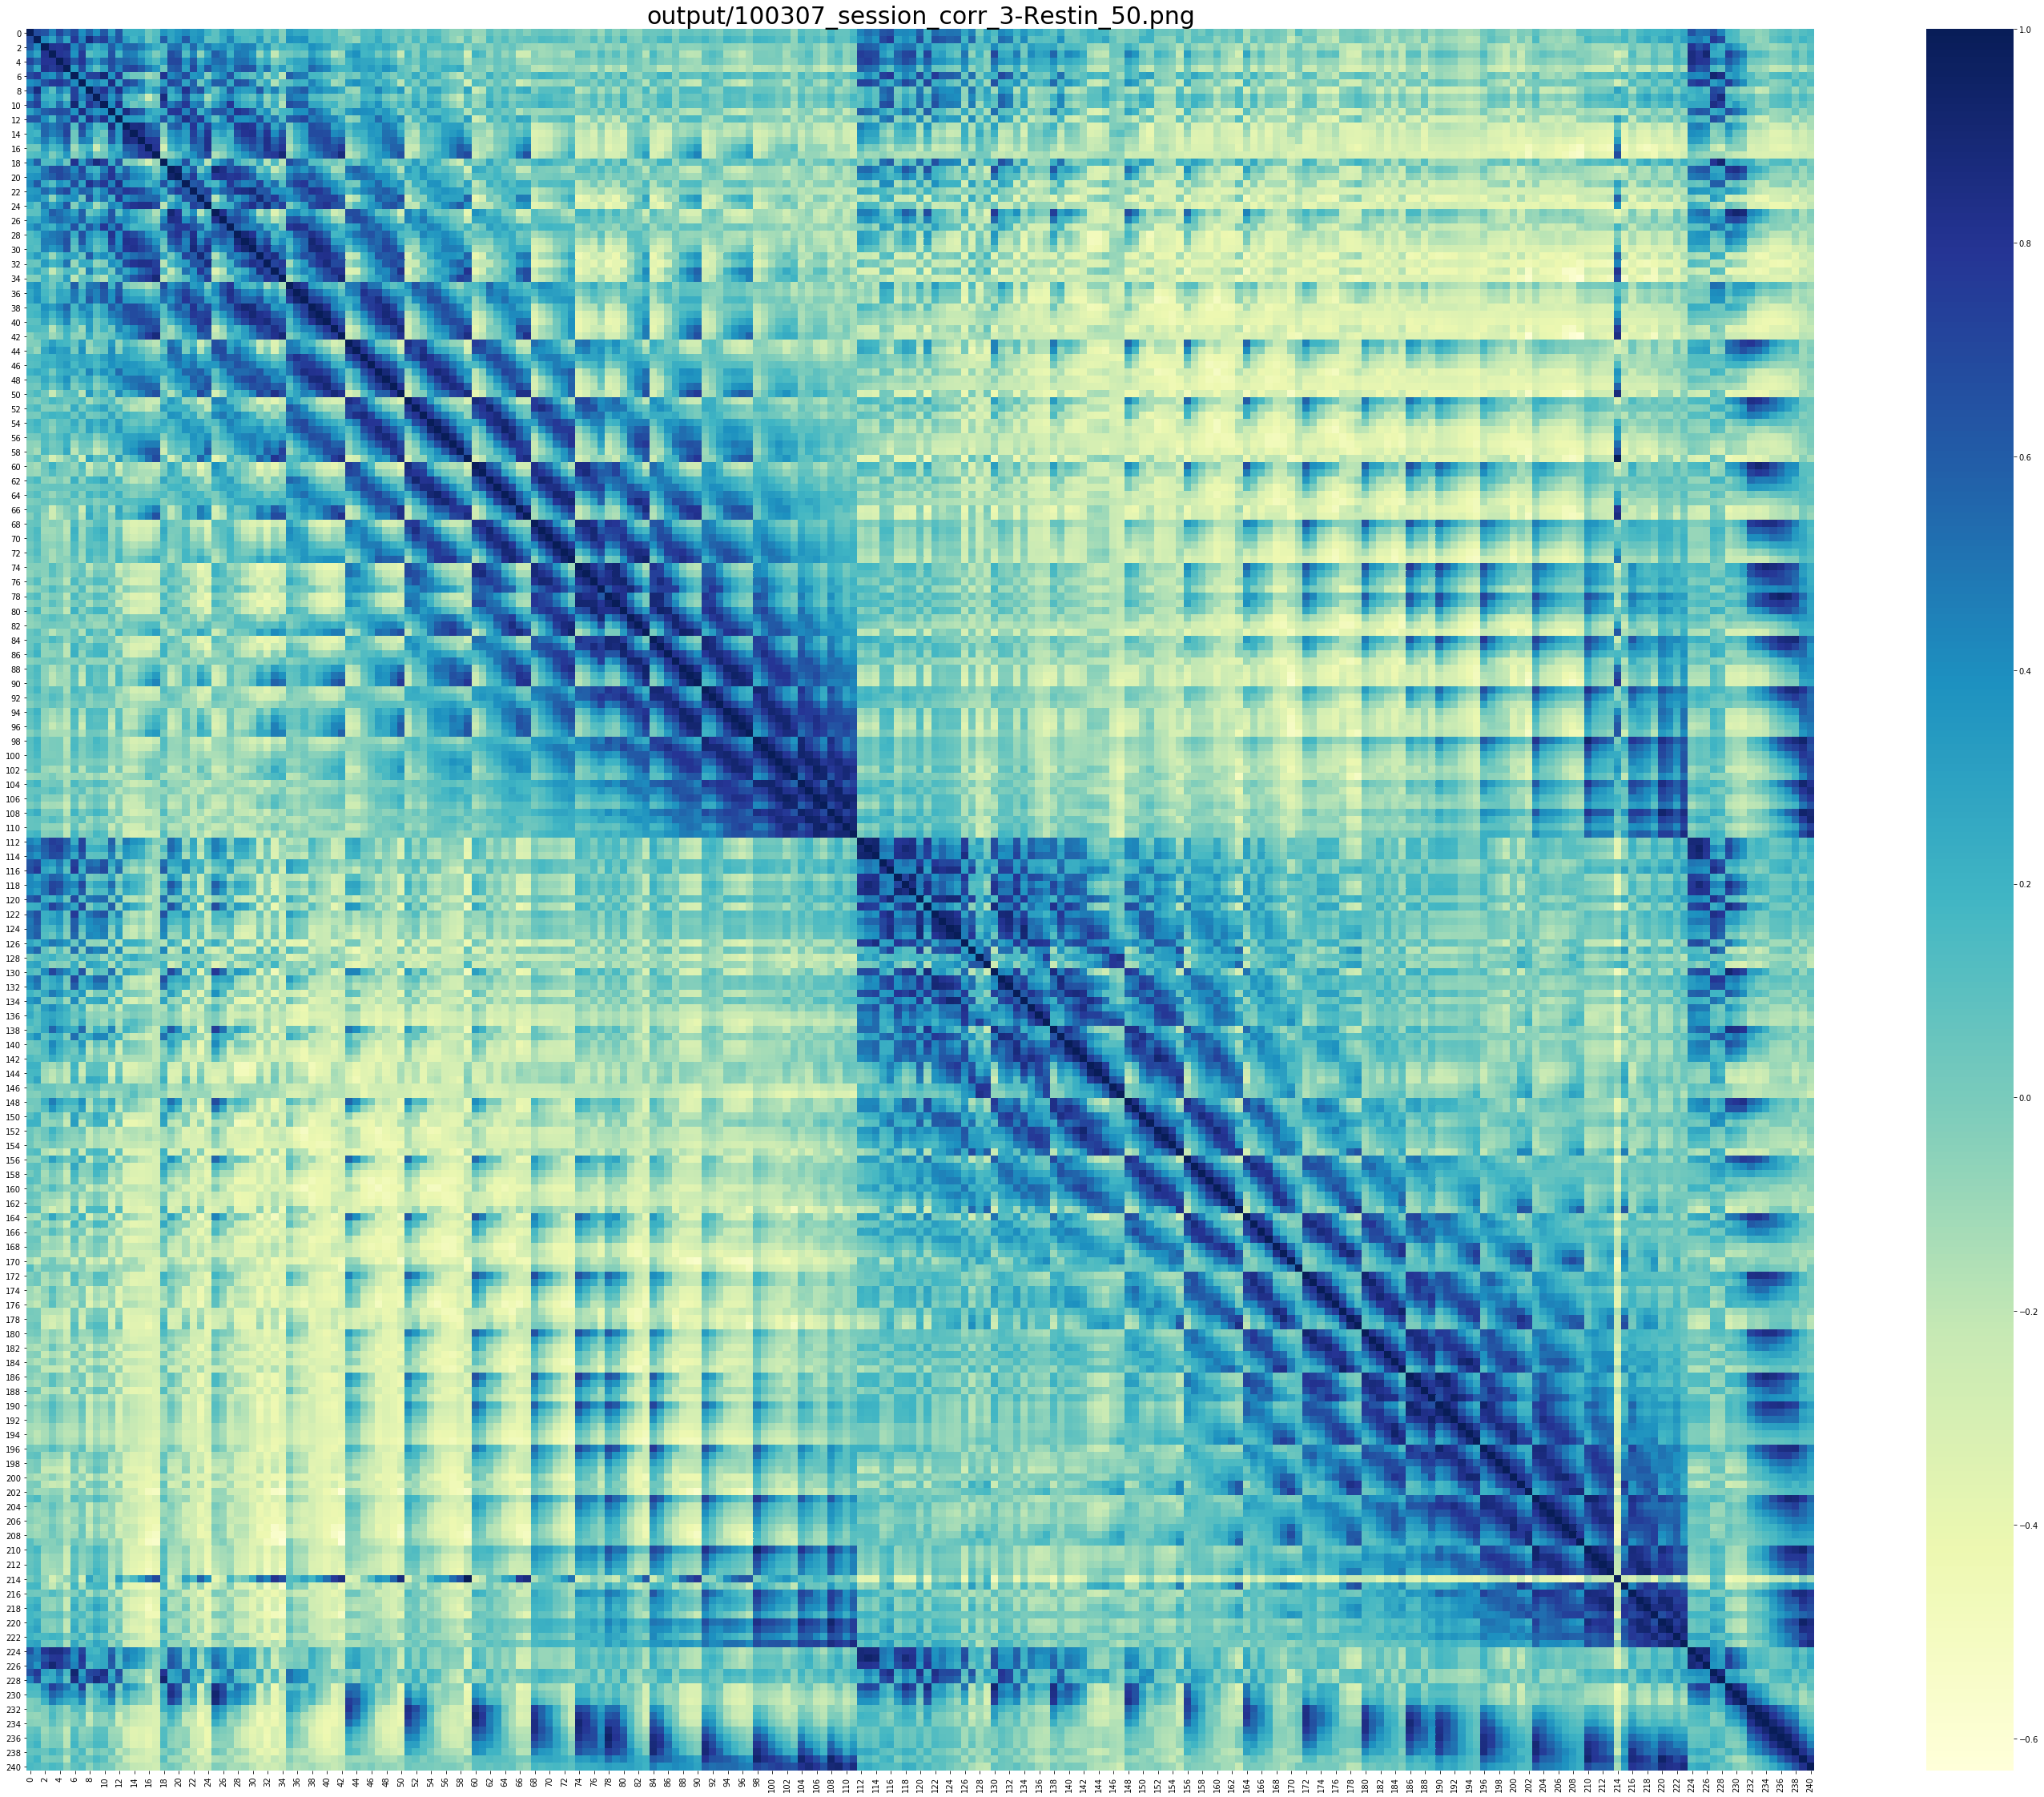

<Figure size 432x288 with 0 Axes>

In [158]:
analysis_smooth_over_session(data, win_size=50, sampling=50)

(241, 299)


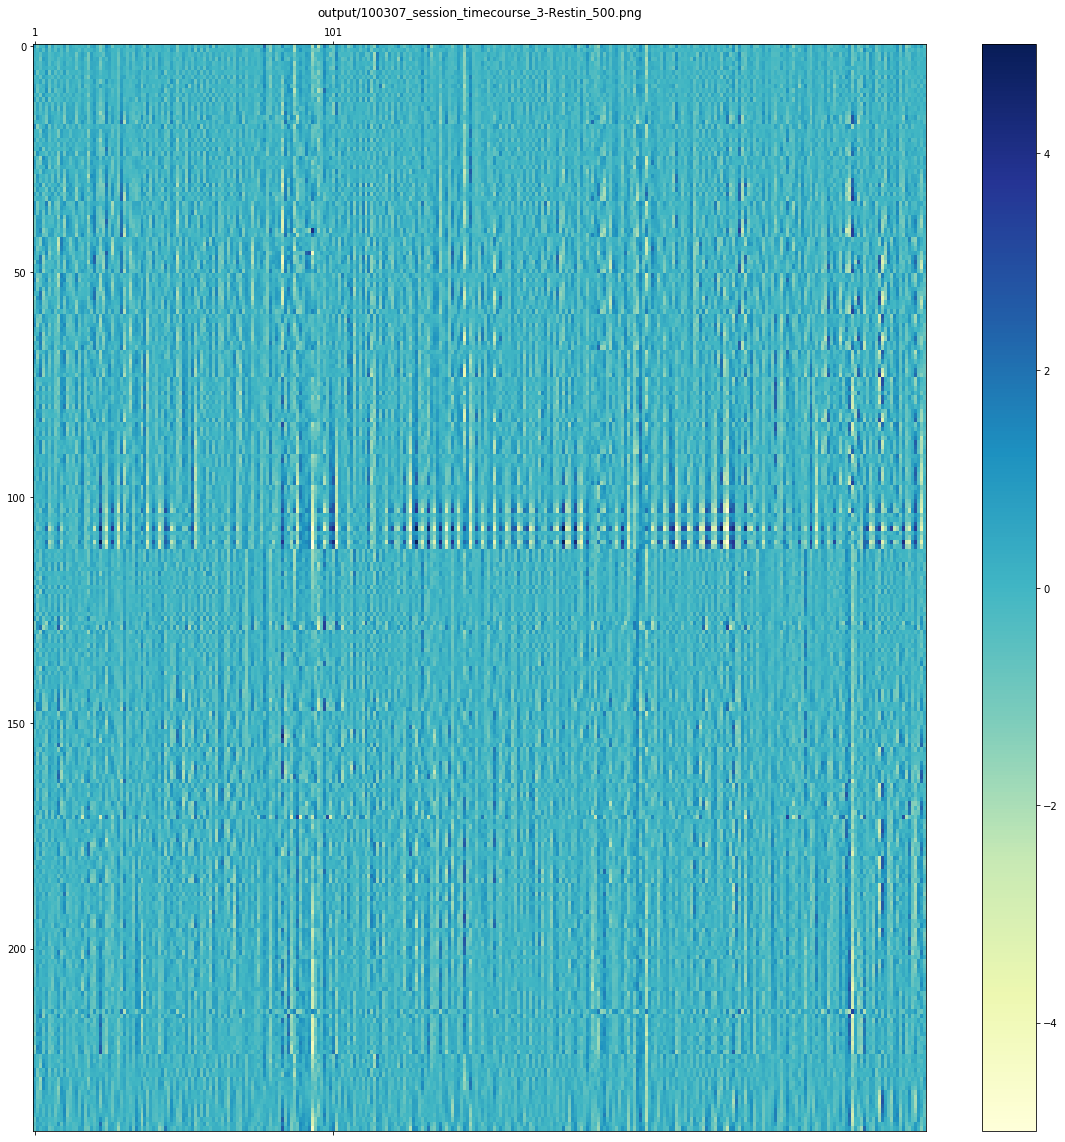

<Figure size 432x288 with 0 Axes>

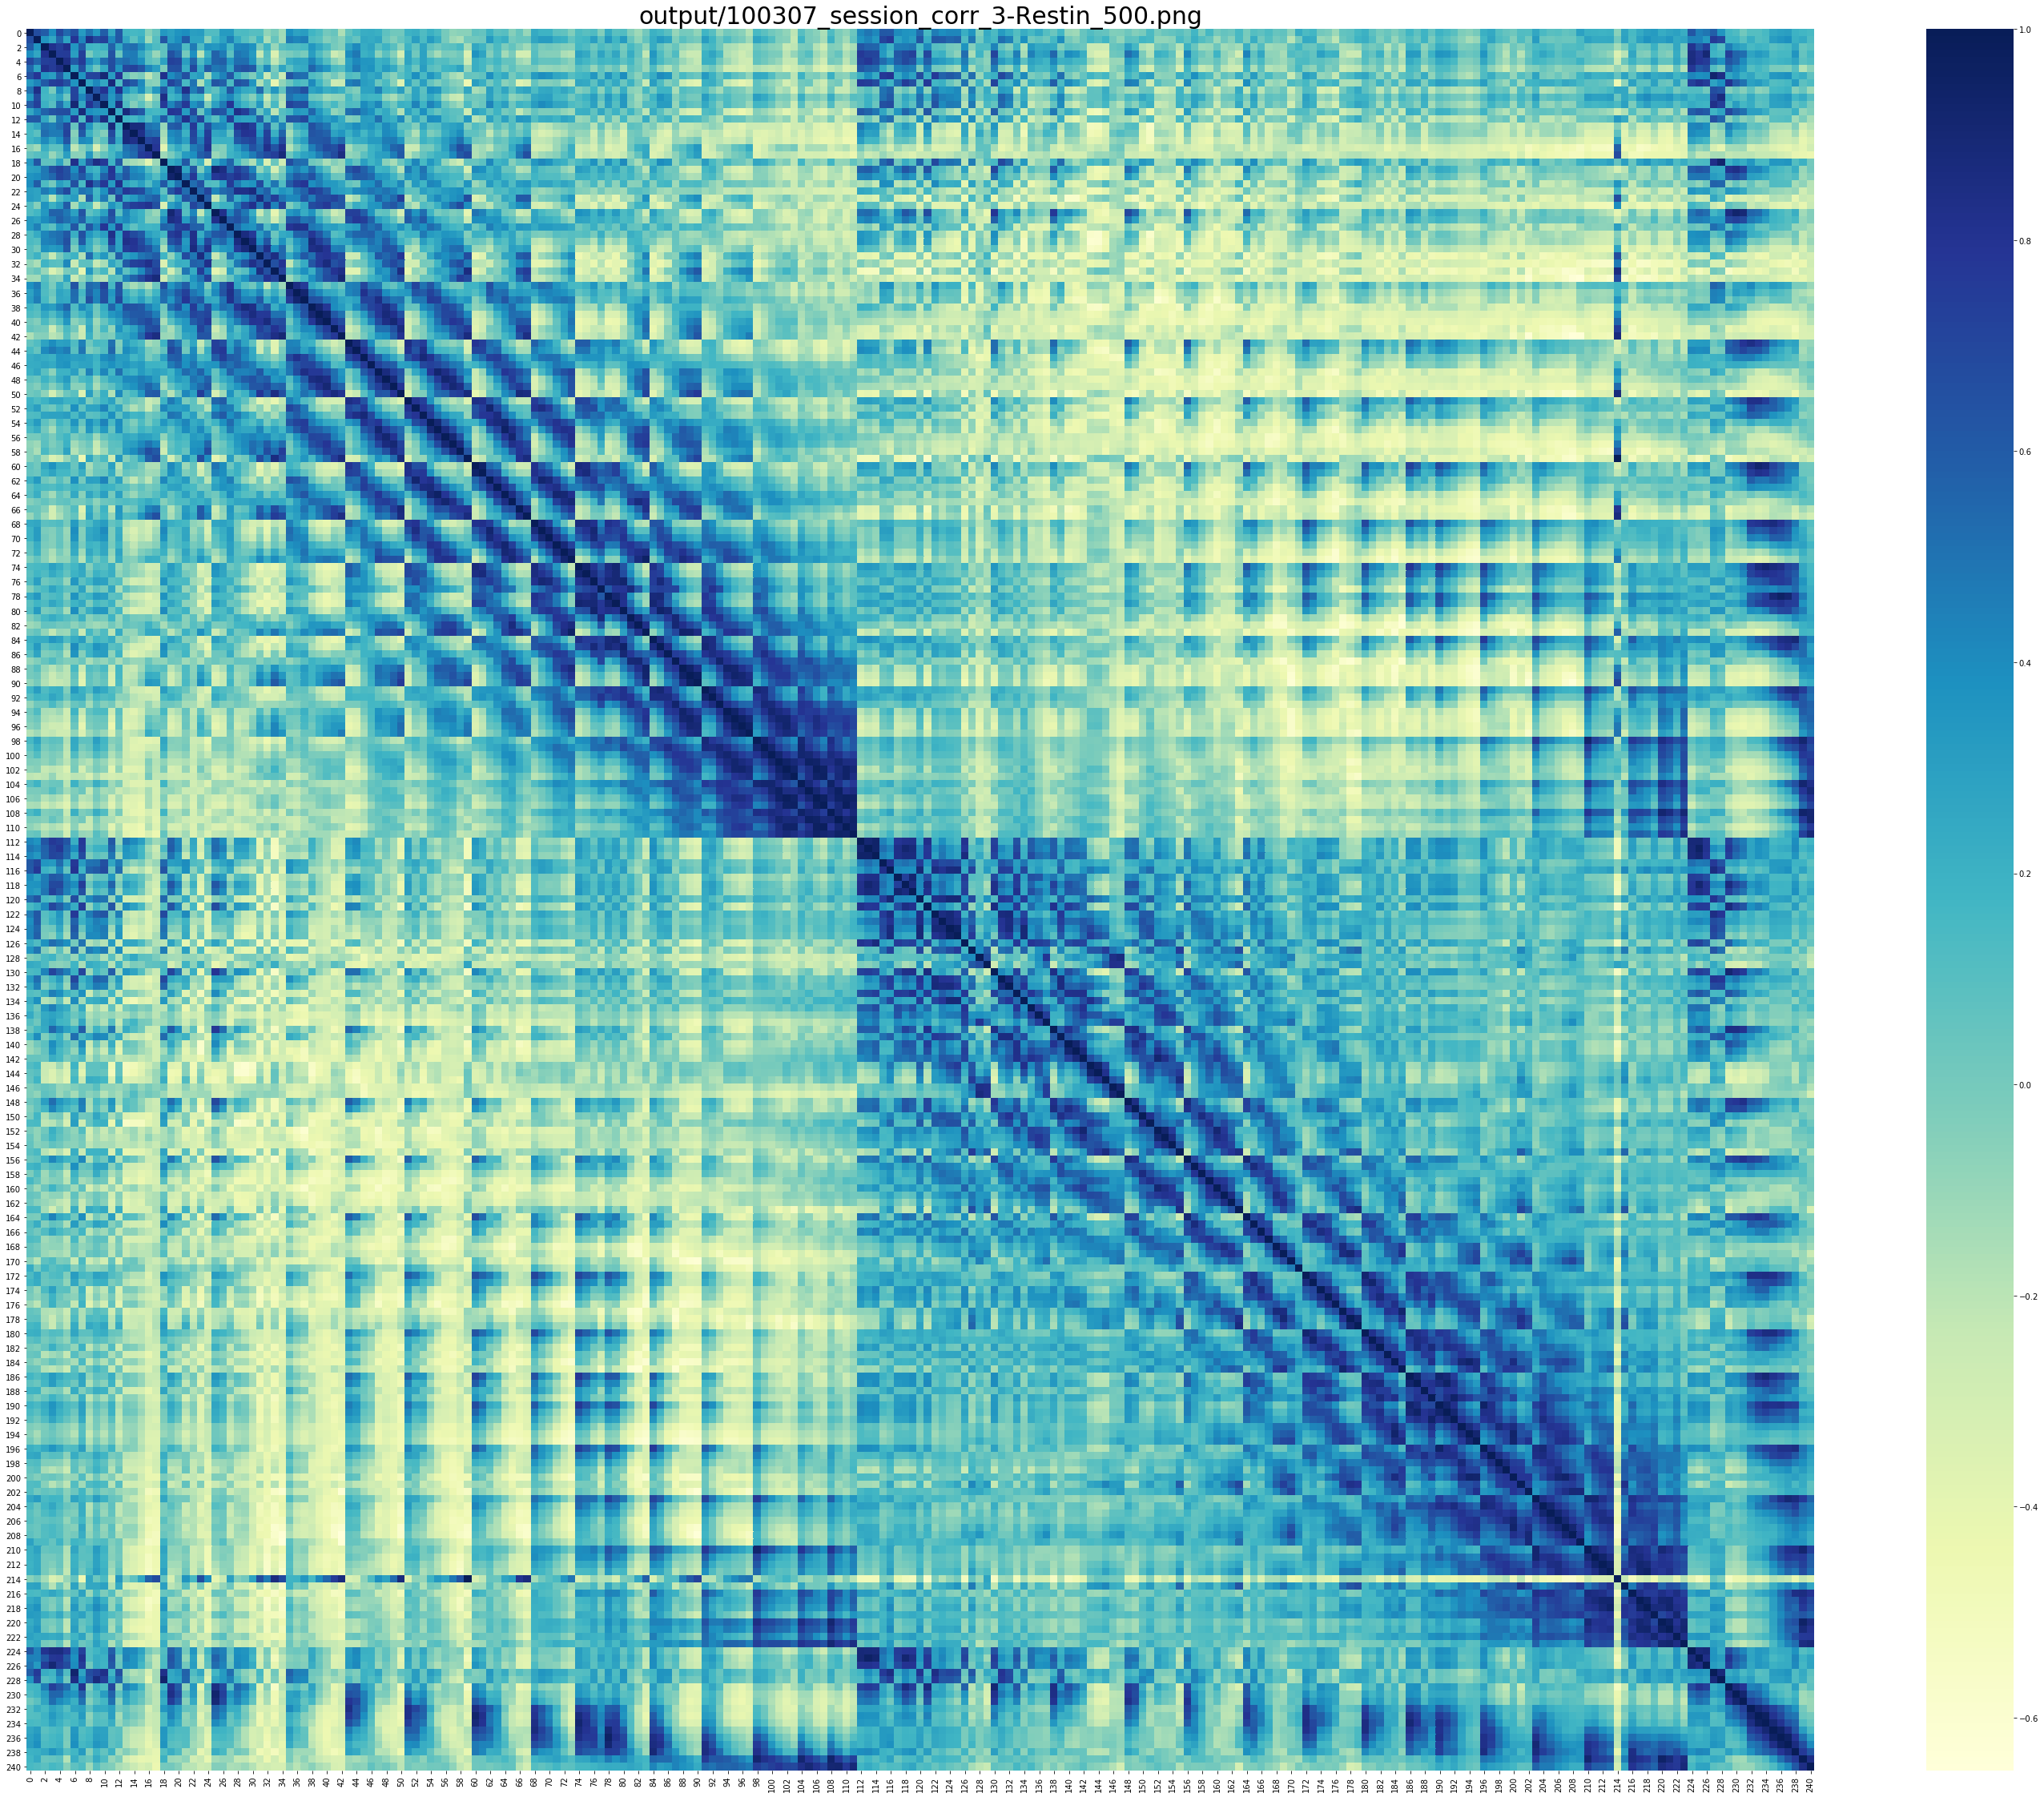

<Figure size 432x288 with 0 Axes>

In [159]:
analysis_smooth_over_session(data, win_size=500, sampling=500)

(241, 149)


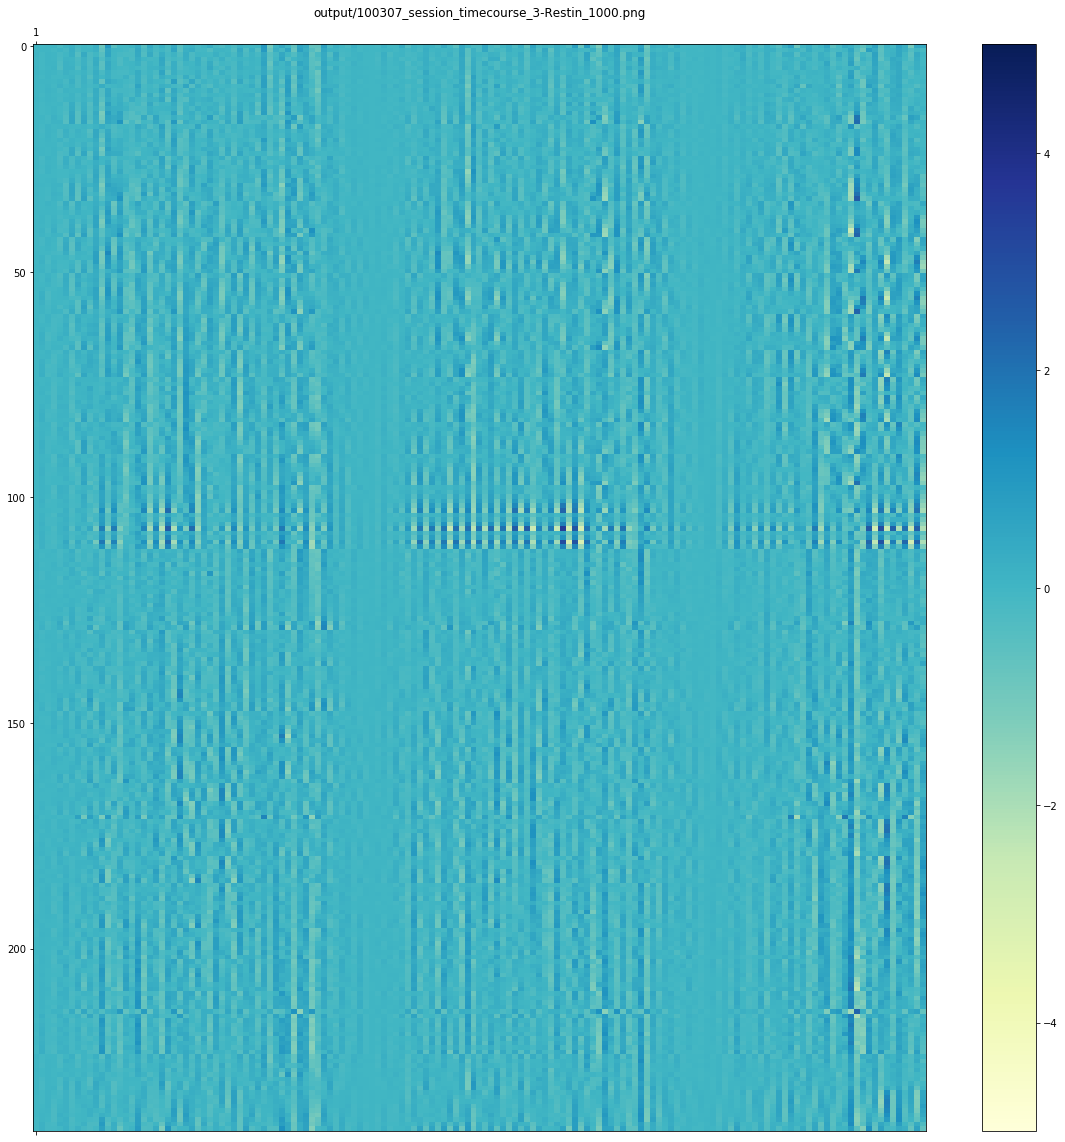

<Figure size 432x288 with 0 Axes>

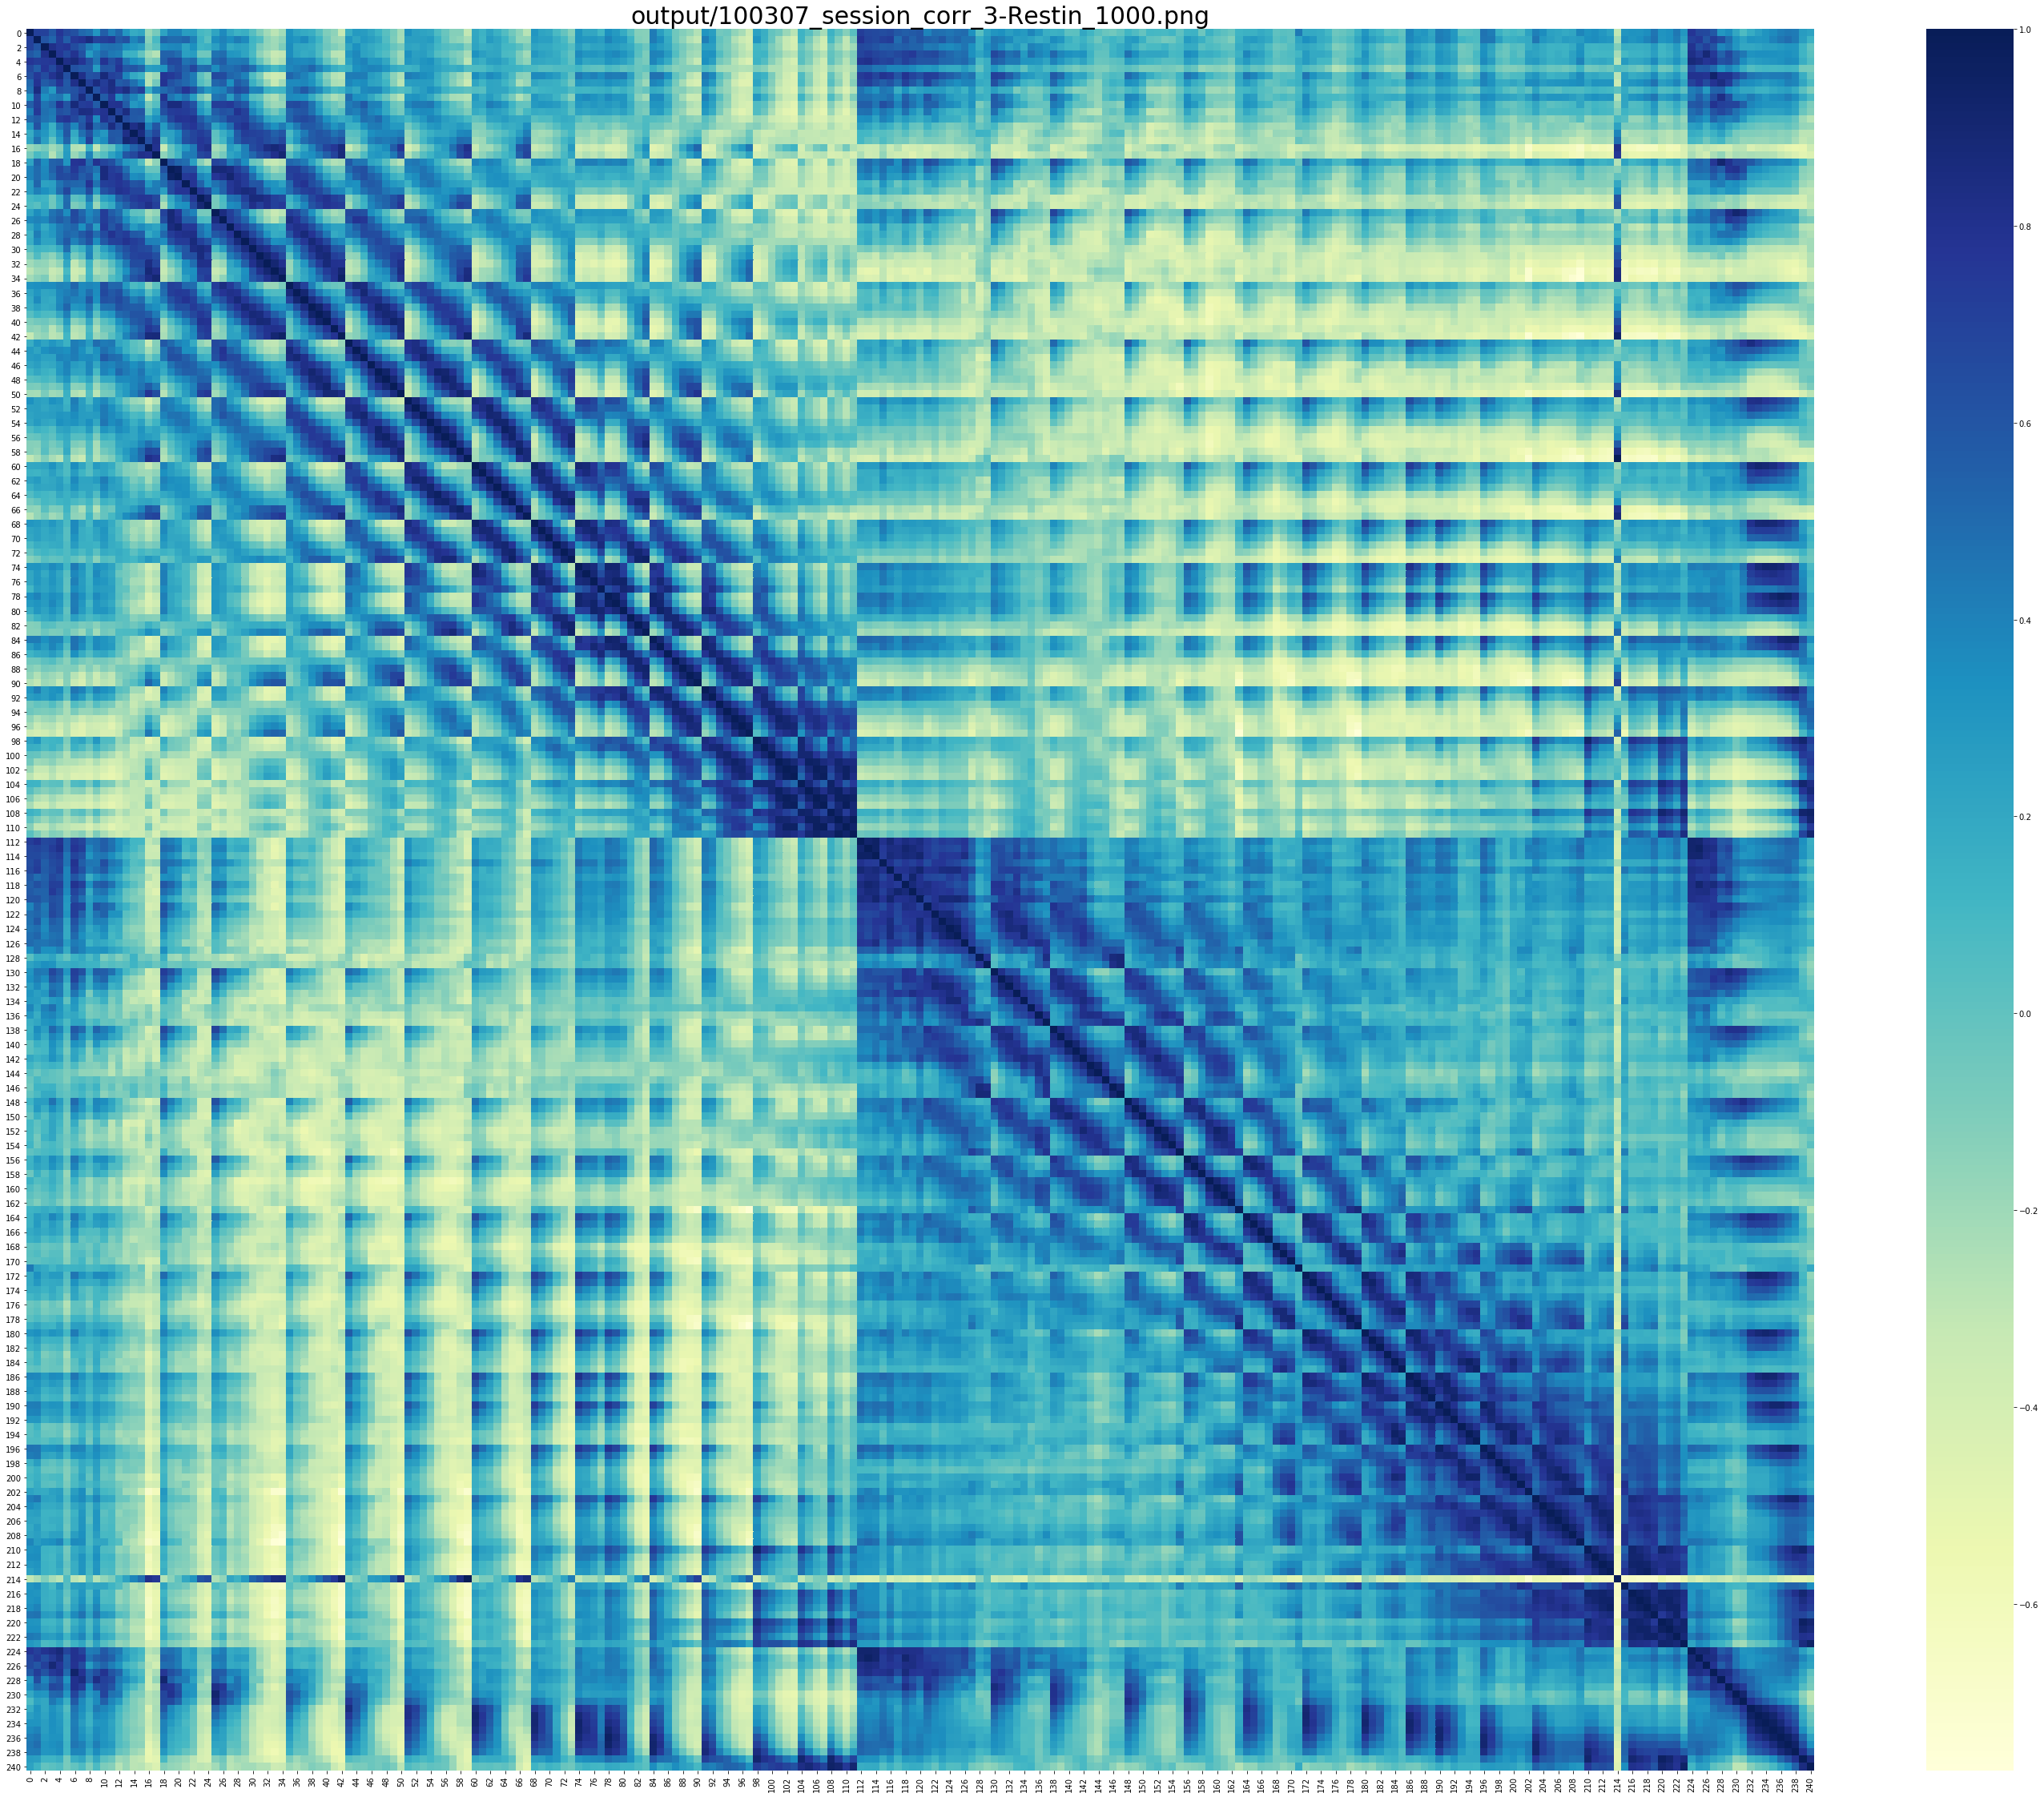

<Figure size 432x288 with 0 Axes>

In [160]:
analysis_smooth_over_session(data, win_size=1000, sampling=1000)

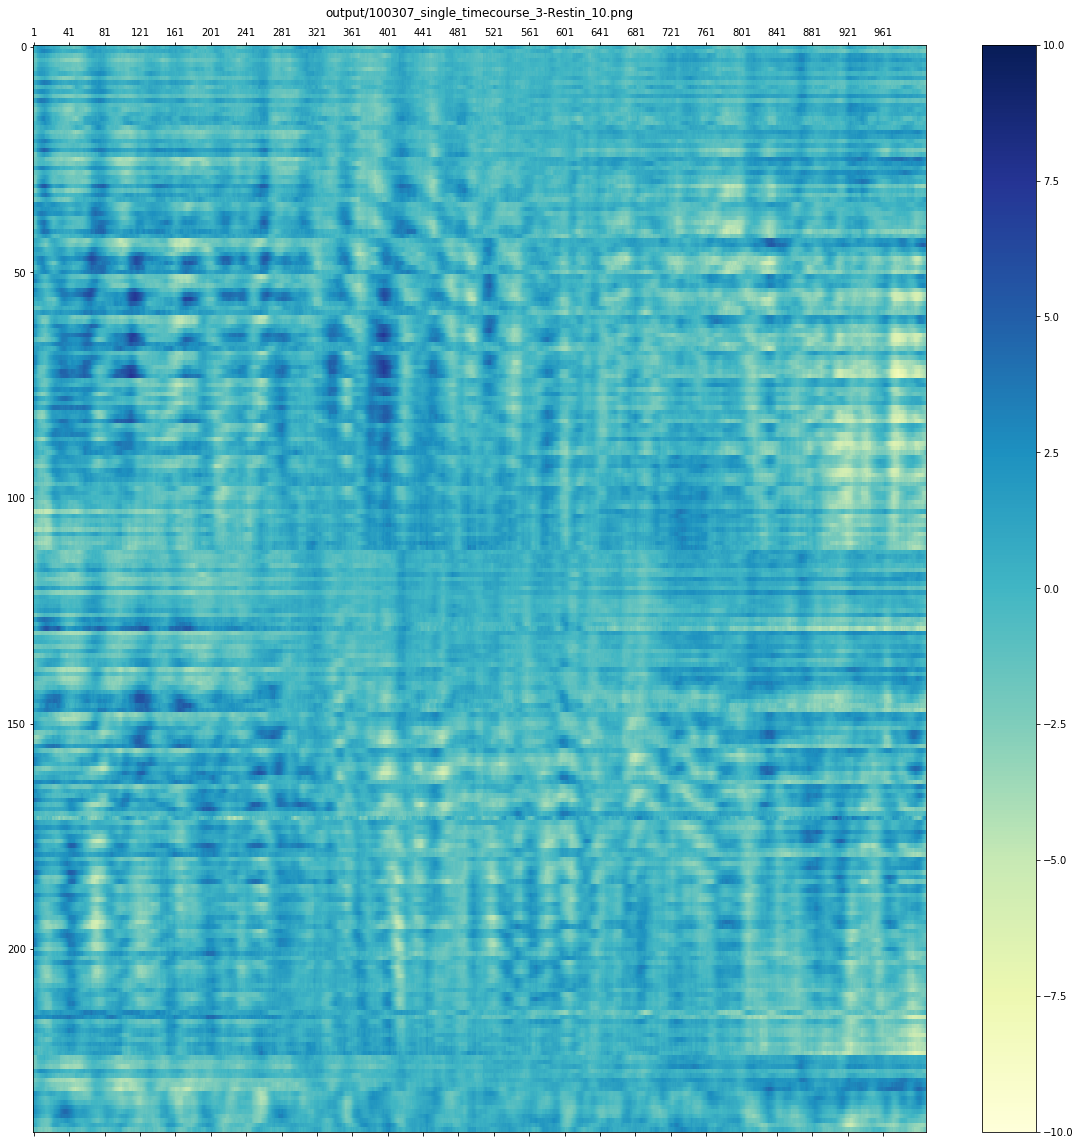

<Figure size 432x288 with 0 Axes>

In [155]:
analysis_smooth_single_trial(data, win_size=10)

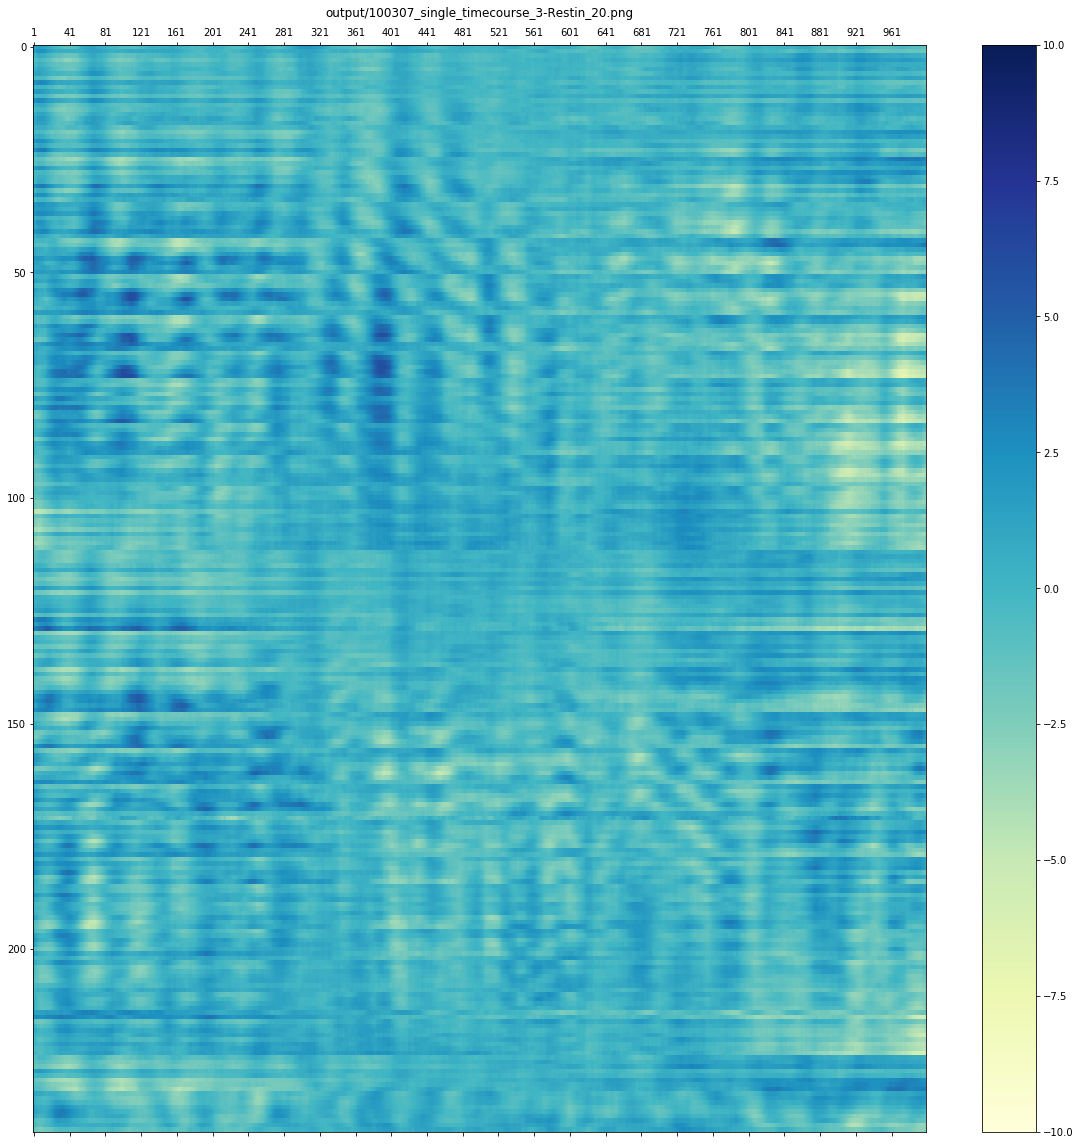

<Figure size 432x288 with 0 Axes>

In [156]:
analysis_smooth_single_trial(data, win_size=20)